In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader.data as web
import fbprophet

import investpy as ipy #investing.com python library 

import datetime as dt
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
%matplotlib inline

In [4]:
btc = ipy.get_crypto_historical_data(crypto='bitcoin', from_date='01/01/2012', to_date = '13/03/2021')

print(btc.head())

            Open  High  Low  Close  Volume Currency
Date                                               
2012-01-01   4.7   5.5  4.6    5.3  108509      USD
2012-01-02   5.3   5.5  4.8    5.2   69151      USD
2012-01-03   5.2   5.3  4.7    4.9  125170      USD
2012-01-04   4.9   5.7  4.8    5.6  131171      USD
2012-01-05   5.6   7.2  5.6    6.9  182328      USD


In [5]:
btc = btc.reset_index()

In [6]:
btc['Close'] = btc['Close'].apply(np.log) # calculate Log Price for BTC

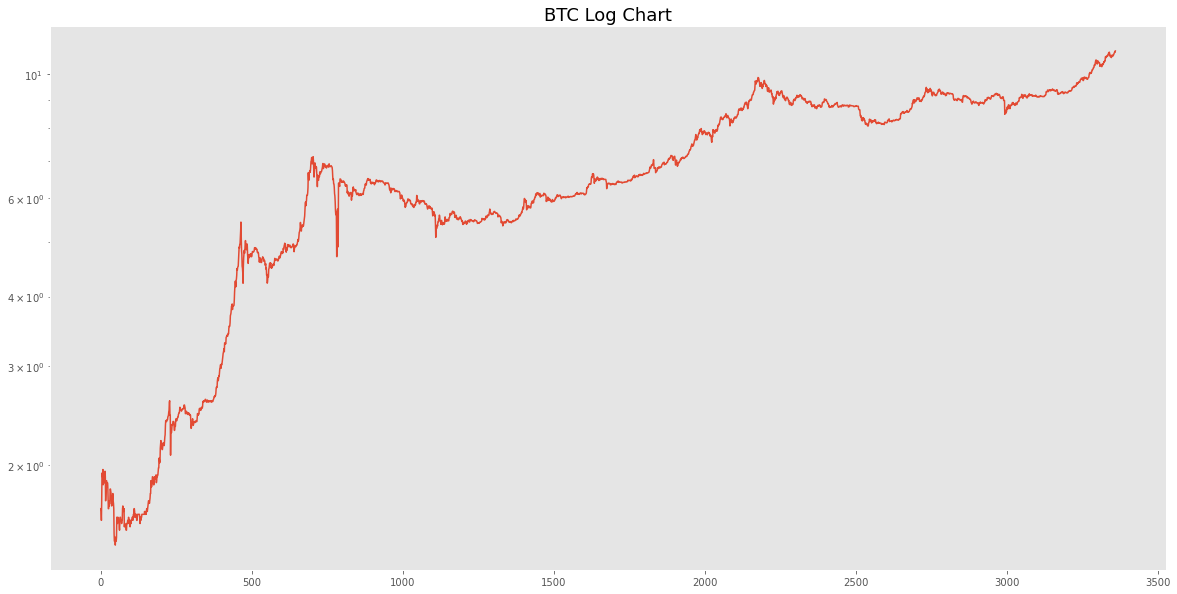

In [7]:
f, ax = plt.subplots(figsize=(20,10))

btc['Close'].plot()
plt.yscale("log")
plt.title('BTC Log Chart', fontsize =18)
ax.grid(False)

In [8]:
# Drop the columns
prophet_df = btc.drop(['Open', 'High', 'Low','Volume', 'Currency'], axis=1)
prophet_df.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

prophet_df.head()

,ds,y
0,2012-01-01,1.667707
1,2012-01-02,1.648659
2,2012-01-03,1.589235
3,2012-01-04,1.722767
4,2012-01-05,1.931521


In [9]:
m = fbprophet.Prophet()

m.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
# Create Future dates
fut_prices = m.make_future_dataframe(periods=365)

# Predict Prices
forecast = m.predict(fut_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3720,2022-03-09,10.740401,9.544529,11.995209
3721,2022-03-10,10.735214,9.515622,12.001094
3722,2022-03-11,10.731472,9.533572,12.030093
3723,2022-03-12,10.727830,9.470313,12.005637
3724,2022-03-13,10.718950,9.422599,12.046313


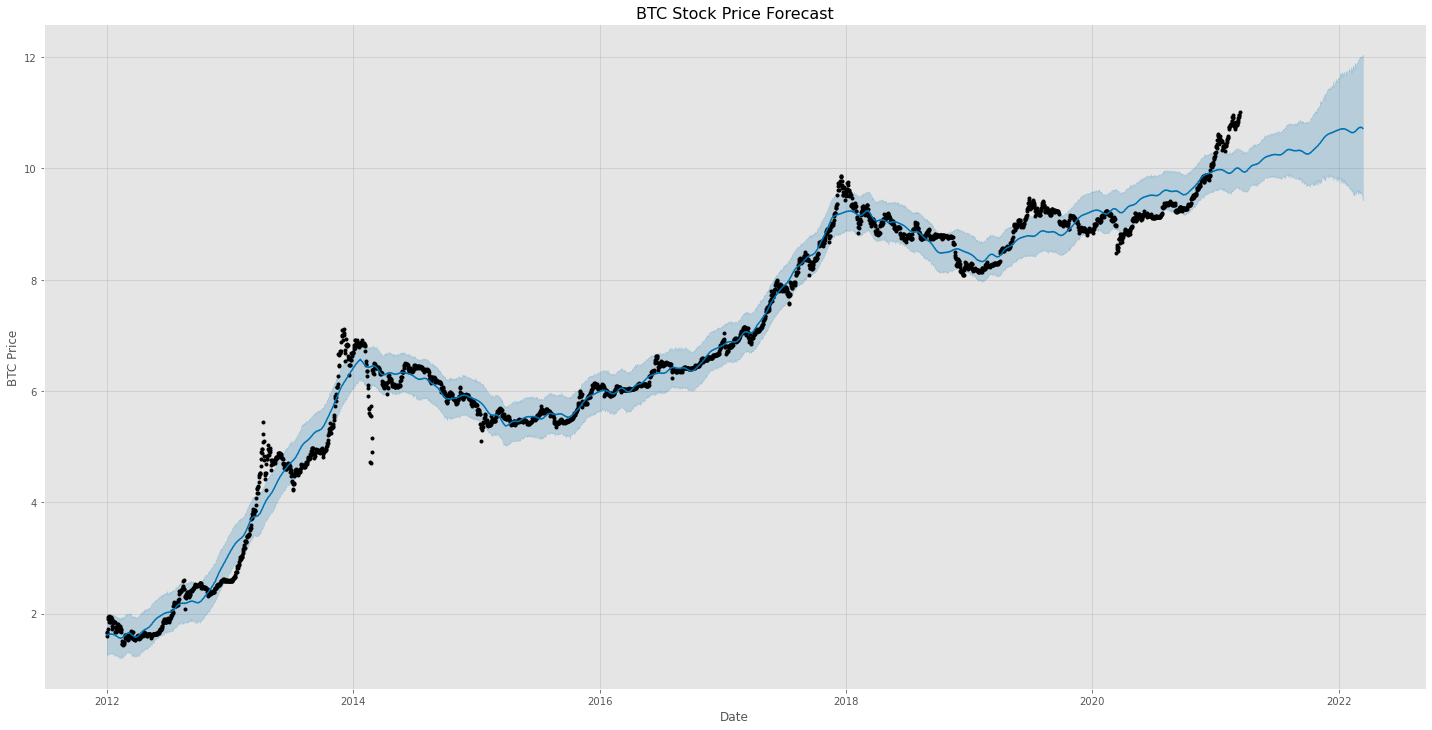

In [13]:
import datetime as dt
import matplotlib.dates as mdates

# Dates
starting_date = dt.datetime(2019, 11, 11)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2020, 1, 11)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2019, 9, 11)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Learn more Prophet tomorrow and plot the forecast for amazon.
fig = m.plot(forecast, figsize=(20,10))
ax1 = fig.add_subplot(111)
ax1.set_title("BTC Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("BTC Price", fontsize=12)

plt.show()

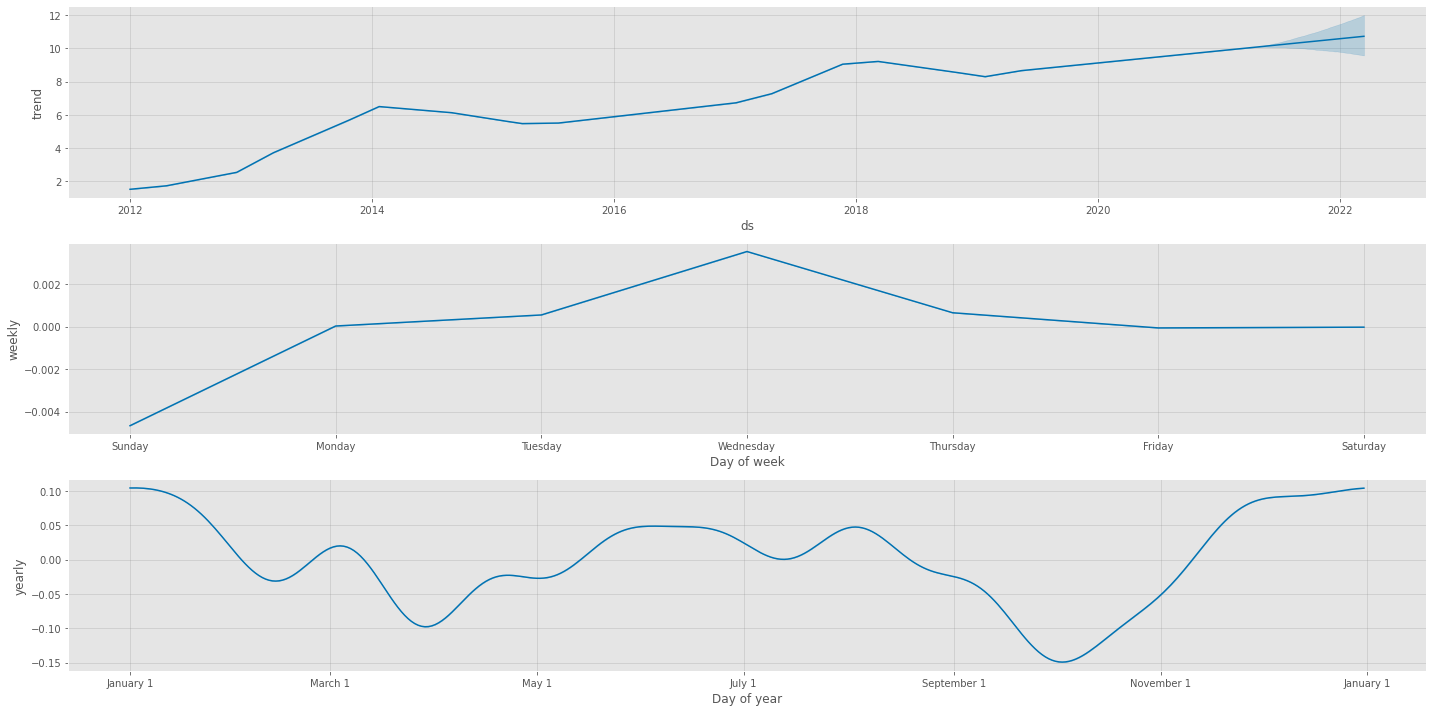

In [14]:
fig2 = m.plot_components(forecast, figsize=(20,10))
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


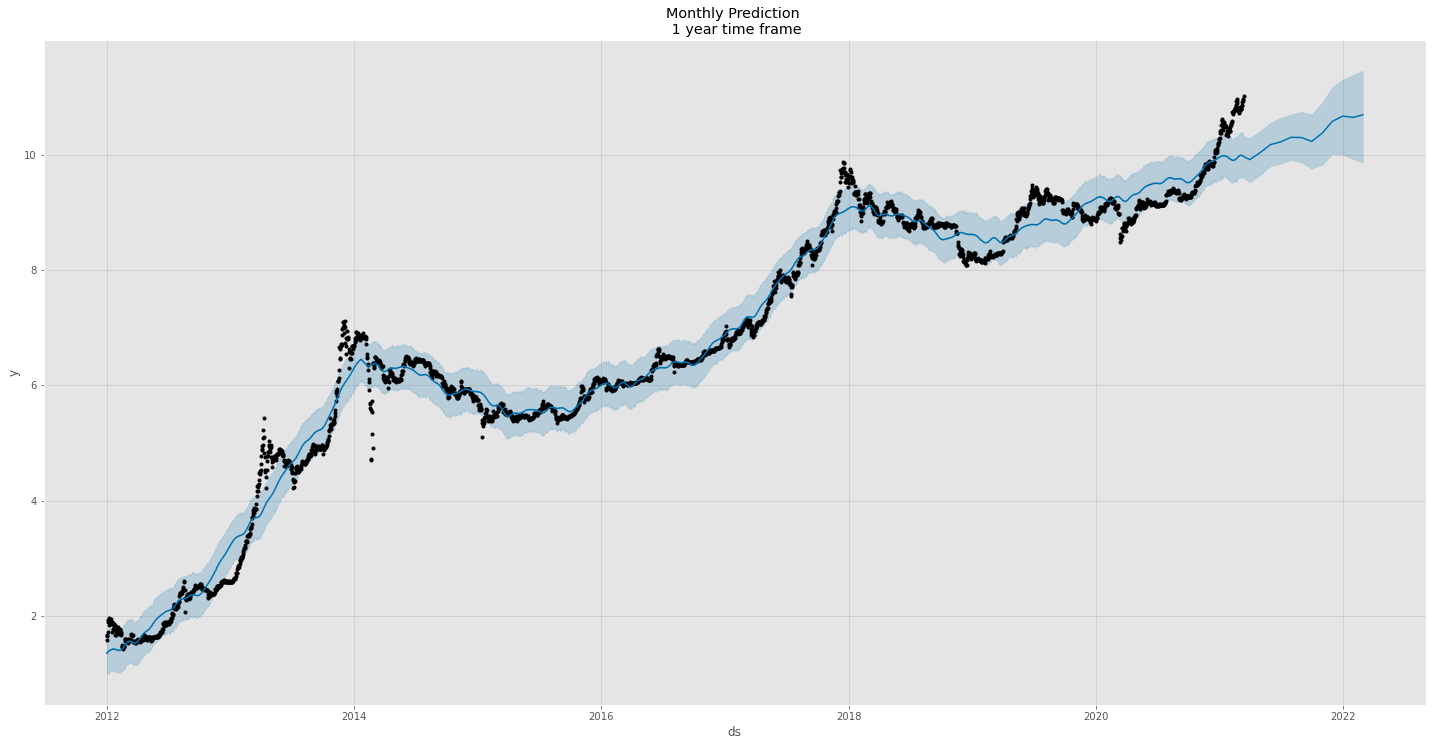

In [15]:
# Monthly Data Predictions
m = fbprophet.Prophet(changepoint_prior_scale=0.01).fit(prophet_df)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst, figsize=(20,10))
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()